# Simple Demonstration of Myopic Robot
This notebook is a simple demonstration of the Informative Path Planning Problem.

We draw upon the work presented in the dubins and ipp notebooks to show a point robot navigating a simple world which can be modeled as a Gaussian Process.

In [1]:
# Library Imports and Notebook Properties
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
from sklearn import mixture
from IPython.display import display
from scipy.stats import multivariate_normal
import numpy as np
import math
import os
import GPy as GPy

%matplotlib inline

/home/vpreston/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Imports from Methods developed in other Notebooks
import belief
import model 
import robot

from path_generator import *
from model import *
from belief import *
from robot import *

## Testing our Classes
We're first going to walk through the different methods we've developed in order to perform this path planning problem. Let's look at the properties of the world first, focusing on the model and belief libraries.

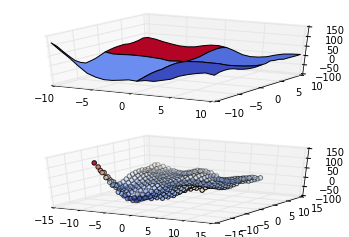

Environment initialized with bounds X1: ( -10.0 , 10.0 )  X2:( -10.0 , 10.0 )


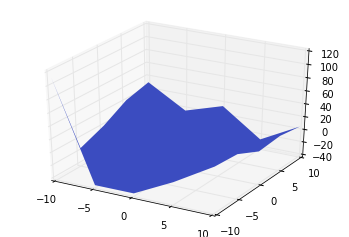

In [9]:
reload(belief)
reload(model)
from belief import *
from model import *

# x1min, x1max, x2min, x2max constrain the extent of the rectangular domain
ranges = (-10, 10, -10, 10)

# Create a random enviroment sampled from a GP with an RBF kernel and specified hyperparameters, mean function 0 
# The enviorment will be constrained by a set of uniformly distributed  sample points of size NUM_PTS x NUM_PTS

# Environment comes from the belief library, and calls upon the GPModel that is in the model library
world = Environment(ranges, NUM_PTS = 20, variance = 100.0, lengthscale = 3.0, visualize = True)

# Generate observations at random locations in environment and plot resulting predicted model
x1observe = np.linspace(ranges[0], ranges[1], 5)
x2observe = np.linspace(ranges[2], ranges[3], 5)
x1observe, x2observe= np.meshgrid(x1observe, x2observe, sparse = False, indexing = 'xy')
data = np.vstack([x1observe.ravel(), x2observe.ravel()]).T
observations = world.sample_value(data)

fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
surf = ax1.plot_surface(x1observe, x2observe, observations.reshape(x1observe.shape), cmap = cm.coolwarm, linewidth = 0)
plt.show()    

Now, let's check out the path_generation module.

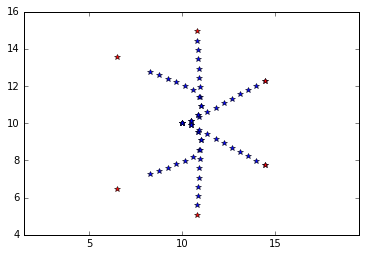

In [10]:
# Pick one of the path generation models
DEPG = Dubins_EqualPath_Generator(frontier_size=6, horizon_length=5, turning_radius=1, sample_step=0.5)
s = DEPG.get_path_set((10,10,0))

# Methods for calling all of the data
m = DEPG.get_frontier_points()
m = np.array(m)
l = DEPG.get_sample_points()

# Plotting for convenience
fig,ax = plt.subplots(1,1)
ax.axis('equal')
for key,val in l.items():
    f = np.array(val)
    plt.plot(f[:,0], f[:,1], 'b*')
    
plt.plot(m[:,0], m[:,1], 'r*')
plt.show()

And now the robot...

In [13]:
reload(robot)
reload(model)
from robot import *
from model import *

explorer = Robot((0,0,0)) #create a robot that starts at the origin of some world

ranges = (-10,10,-10,10) #extent of the world
explorer.initializeGP(ranges, 100) #instantiate a belief model on the robot

## Scenario

We're now going to create a scenario in which there is a single hotpot in a world. The robot begins with a uniform prior over the belief model. The robot will select from a frontier where to go myopically, using the UCB rule to make a decision. The exploration will stop after n steps of the robot.

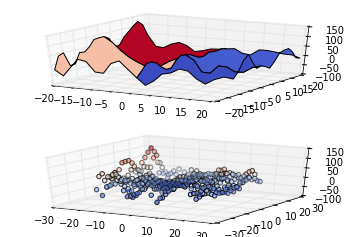

Environment initialized with bounds X1: ( -20.0 , 20.0 )  X2:( -20.0 , 20.0 )


In [14]:
# build the model to sample from
ranges = (-20,20,-20,20)
world = Environment(ranges, NUM_PTS = 20, variance = 100.0, lengthscale = 3.0, visualize = True)

In [ ]:
# instantiate the robot and path sets available
robin = Robot(0,0,0)
robin.initializeGP(ranges, 20, visualize=False)
robin.initializePath('dubins_equal', frontier_size=10, horizon_length=3, turning_radius=0.1, sample_size=0.2)

In [ ]:
# begin exploration
final_state = robin.explore(world, budget=60)

In [ ]:
# show visualization of the exploration and data collected along the way
final_state.show()